#  **1. Background**
Salifort Motors is a fictional French-based alternative energy vehicle manufacturer. Its global workforce of over 100,000 employees research, design, construct, validate, and distribute electric, solar, algae, and hydrogen-based vehicles. Salifort’s end-to-end vertical integration model has made it a global leader at the intersection of alternative energy and automobiles.

As a data specialist working for Salifort Motors, you have received the results of a recent employee survey. The senior leadership team has tasked you with analyzing the data to come up with ideas for how to increase employee retention. To help with this, they would like you to design a model that predicts whether an employee will leave the company based on their  ***department***, ***number of projects***, ***average monthly hours***, and ***any other data points*** you deem helpful. 

# **2. Plan**
## **2.1 Objective / Deliverables**
The aim of the data project is to understand the driving factors that contribute to employee churn and to produce a predictive model for employee retention. Based on these contributing factors, strategies will be recommended to senior leadership to increase employee retention.


## **2.2 Initial Data Exploratory Analysis (EDA)**
Before any exploratory data analytics or model building can occur, it is important to understand the dataset. The data is derived from employee surveys and may contain duplicates, missing data (*i.e.,* unfilled fields), outliers (*i.e.,* misfilled fields), or formatting issues (*i.e.,* numbers stored as strings). The initial EDA aims to understand the data features, data types, and to perform data cleaning.

### **Importing packages**

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, make_scorer
from xgboost import XGBClassifier, plot_importance

# Prevent warnings appearing
import warnings
warnings.filterwarnings('ignore')



### **Load dataset**

In [2]:
# Import dataset
df = pd.read_csv(r"C:\Users\dell\Downloads\Capstone Project\HR_Sailfort_dataset.csv")


### **Basic information about data**

In [3]:
# Gather basic information about the data
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
# Gather basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### **Descriptive statsitics about the data**

In [5]:
# Gather descriptive statistics about the data
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### **Observations**
From our initial observations and information provided by the dataset owners, we observe that our dataset consists of 15 000 rows and 10 columns. Numerical fields (float or integer) include satisfaction_level, last_evaluation, number_project, average_monthly_hours, time_spend_company, Work_accident, left, and promotion_last_5years. String fields include Department and salary. A summary of the variables is provided below:

Variable | Field Type | Description |
---|---|---|
satisfaction_level|float|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|float|Score of employee's last performance review [0&ndash;1]|
number_project|integer|Number of projects employee contributes to|
average_montly_hours|integer|Average number of hours employee worked per month|
time_spend_company|integer|How long the employee has been with the company (years)
Work_accident|integer|Whether or not the employee experienced an accident while at work
left|integer|Whether or not the employee left the company
promotion_last_5years|Integer|Whether or not the employee was promoted in the last 5 years
Department|string|The employee's department
salary|string|The employee's salary (U.S. dollars)

### Renaming columns
We can notice that average_montly_hours is correctly mispelled. As a data cleaning step, we will rename the columns as well as standardise the names so that they are all in `snake_case`. Longer column names will also be shortened.

In [6]:
# Display all column names
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
df = df.rename({'average_montly_hours':'average_monthly_hours',
                'Work_accident':'work_accident',
                'Department':'department',
                'time_spend_company':'tenure',
                'left':'status'},axis = 1)
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'status',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### **Check missing values**
Check for any missing values in the data.

In [8]:
# Check number of missing values
num_missing = df.isnull().any(axis = 1).sum()
print('Number of missing values: ',num_missing)

Number of missing values:  0


### **Check duplicates**
Check for any duplicate entries in data.

In [9]:
# Check for number of duplicates
num_duplicates = df.duplicated().sum()
print('Number of duplicates: ', num_duplicates)

Number of duplicates:  3008


In [10]:
# Inspect some rows of duplicates
df_duplicates = df[df.duplicated()]
column_names = list(df.columns)
df_duplicates.sort_values(column_names).head(5)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,status,promotion_last_5years,department,salary
12030,0.09,0.62,6,294,4,0,1,0,accounting,low
14241,0.09,0.62,6,294,4,0,1,0,accounting,low
12071,0.09,0.77,5,275,4,0,1,0,product_mng,medium
14282,0.09,0.77,5,275,4,0,1,0,product_mng,medium
12652,0.09,0.77,6,290,4,0,1,0,technical,medium


In [11]:
# Drop duplicates and save resulting dataframe to new variable. df0 will be used for modelling. df1 will be used for visualisations. 
df1 = df.drop_duplicates().copy()
df0 = df1.copy()

# Check for number of duplicates again
print('Number of duplicates: ', df1.duplicated().sum())

Number of duplicates:  0


### **Check outliers**
Check for outliers in the data.

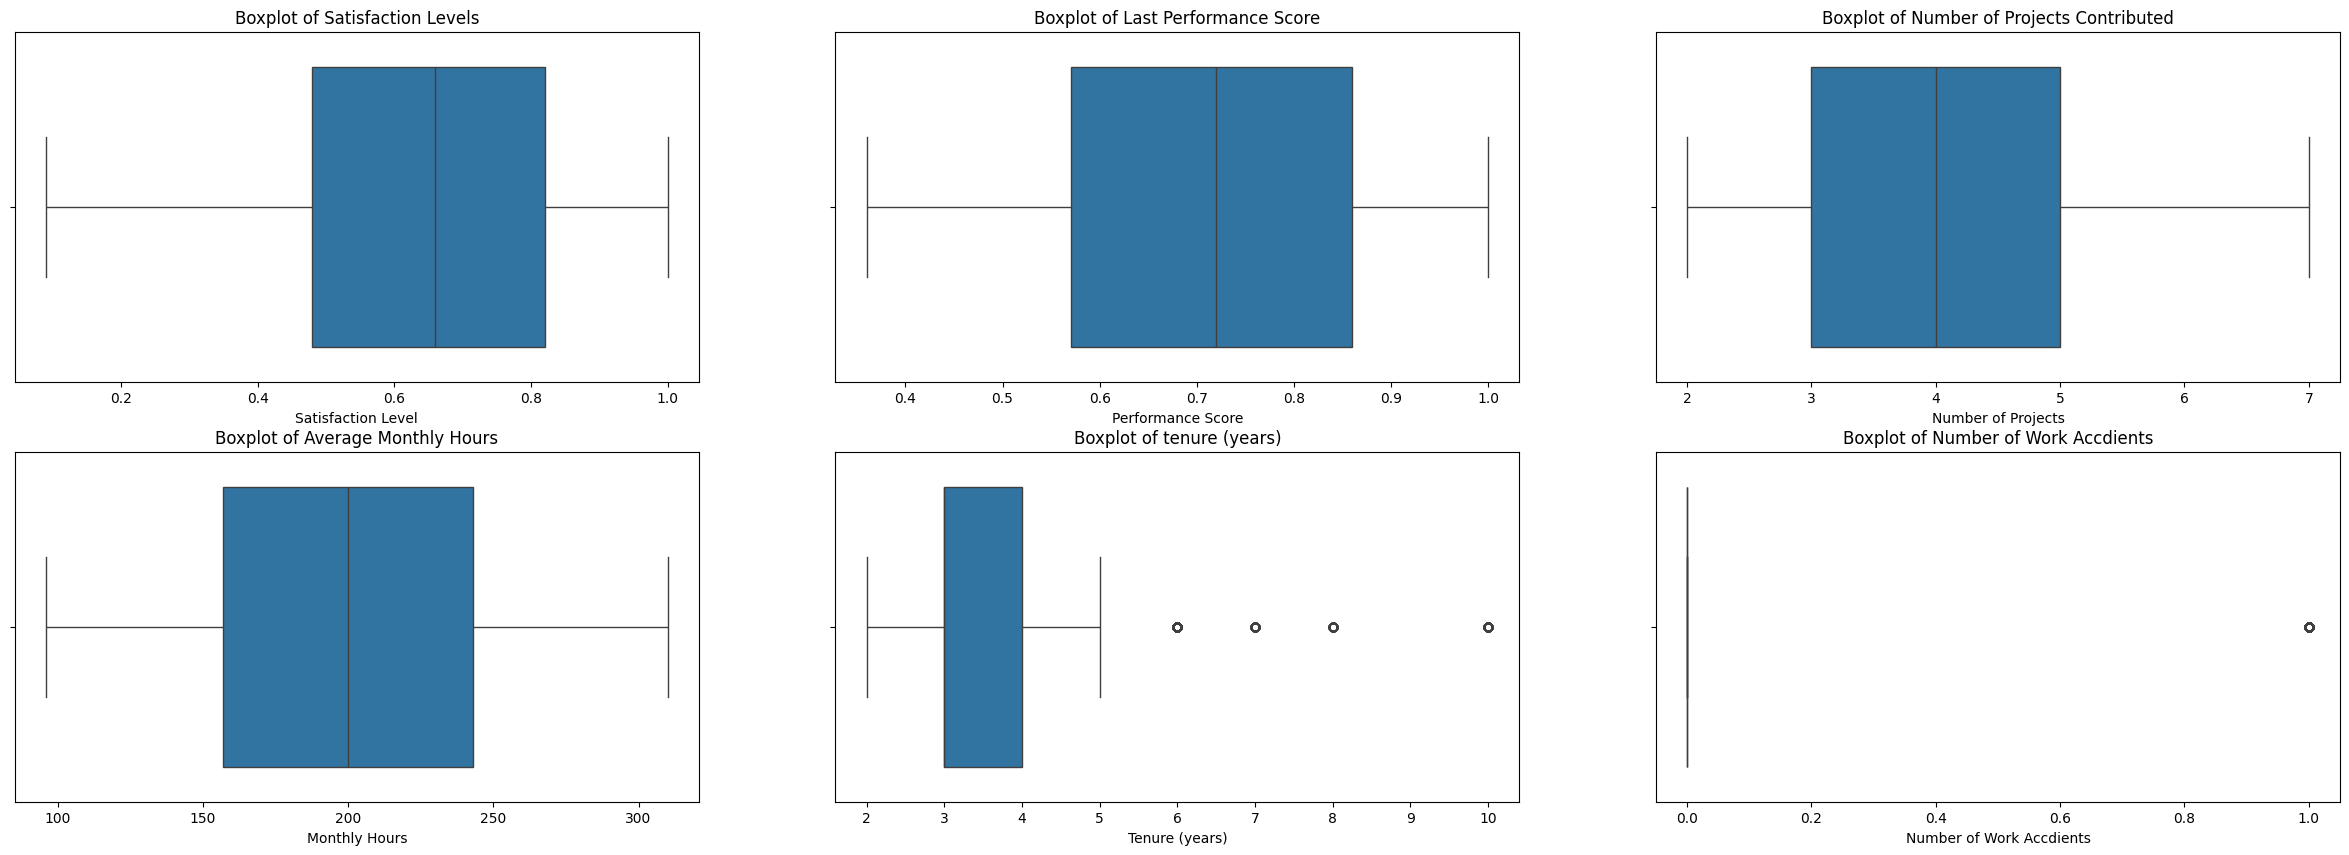

In [12]:
#Create boxplots for all numerical variables to look for outliers
fig, ax = plt.subplots(2,3,figsize = (30,10))

sns.boxplot(data = df1, x = 'satisfaction_level',ax = ax[0,0])
ax[0,0].set_xlabel('Satisfaction Level')
ax[0,0].set_title('Boxplot of Satisfaction Levels')

sns.boxplot(data = df1, x = 'last_evaluation',ax = ax[0,1])
ax[0,1].set_xlabel('Performance Score')
ax[0,1].set_title('Boxplot of Last Performance Score')

sns.boxplot(data = df1, x = 'number_project',ax = ax[0,2])
ax[0,2].set_xlabel('Number of Projects')
ax[0,2].set_title('Boxplot of Number of Projects Contributed')

sns.boxplot(data = df1, x = 'average_monthly_hours',ax = ax[1,0])
ax[1,0].set_xlabel('Monthly Hours')
ax[1,0].set_title('Boxplot of Average Monthly Hours')

sns.boxplot(data = df1, x = 'tenure',ax = ax[1,1])
ax[1,1].set_xlabel('Tenure (years)')
ax[1,1].set_title('Boxplot of tenure (years)')

sns.boxplot(data = df1, x = 'work_accident',ax = ax[1,2])
ax[1,2].set_xlabel('Number of Work Accdients')
ax[1,2].set_title('Boxplot of Number of Work Accdients')


plt.show()

In [13]:
# Determine the number of outliers
q1, q3 = df1['tenure'].quantile([0.25,0.75])
iqr = q3 - q1
upper_outlier_threshold = q3 + iqr
upper_outlier_threshold

num_outliers_tenure = (df1['tenure'] > 5).sum()
print('Number of rows with outlier in tenure column:', num_outliers_tenure)

Number of rows with outlier in tenure column: 824


### **Change data types**
Change column to appropriate data type

In [14]:
# Change status variable from [0,1] to [former_employee, current_employee]

df1['status'] = df1['status'].replace({0:'current_employee',1:'former_employee'})

# Change promotion_last_5years from [0,1] to [no_promotion, promotion]
df1['promotion_last_5years'] = df1['promotion_last_5years'].replace({0:'no_promotion',1:'promotion'})

# Change work accident from [0,1] to [no_accident, accident]
df1['work_accident'] = df1['work_accident'].replace({0:'no_accident',1:'accident'})
print(df1.info())
df1.head(5)

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   tenure                 11991 non-null  int64  
 5   work_accident          11991 non-null  object 
 6   status                 11991 non-null  object 
 7   promotion_last_5years  11991 non-null  object 
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 1.0+ MB
None


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,status,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,no_accident,former_employee,no_promotion,sales,low
1,0.80,0.86,5,262,6,no_accident,former_employee,no_promotion,sales,medium
2,0.11,0.88,7,272,4,no_accident,former_employee,no_promotion,sales,medium
3,0.72,0.87,5,223,5,no_accident,former_employee,no_promotion,sales,low
4,0.37,0.52,2,159,3,no_accident,former_employee,no_promotion,sales,low


### **Data Summary**
A summary of the variables after corrections is provided below:

Variable | Field Type | Description |
---|---|---|
satisfaction_level|float|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|float|Score of employee's last performance review [0&ndash;1]|
number_project|integer|Number of projects employee contributes to|
average_monthly_hours|integer|Average number of hours employee worked per month|
tenure|integer|How long the employee has been with the company (years)
work_accident|integer|Whether or not the employee experienced an accident while at work
status|string|Whether or not the employee left the company
promotion_last_5years|string|Whether or not the employee was promoted in the last 5 years
Department|string|The employee's department
salary|string|The employee's salary (U.S. dollars)

# 3. **Analyse (EDA)**
### **Percetage of employees still present**
We will being by understanding what percentage of employees who took the survey are still left at the company.

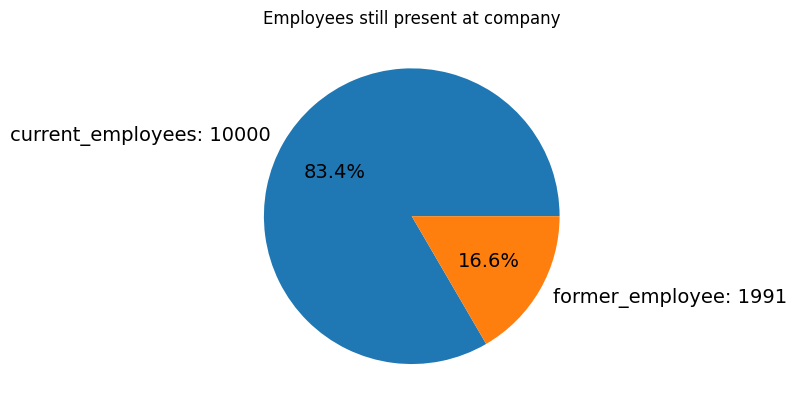

In [15]:
data = df1['status'].value_counts()
plt.pie(data,labels = [f'current_employees: {data.values[0]}',f'former_employee: {data.values[1]}'], autopct = '%1.1f%%',textprops={'fontsize': 14})
plt.title('Employees still present at company')
plt.show()

### **General visualisation**
We will next look at the distributions by the different categories to provide a high-level understanding of the dataset.


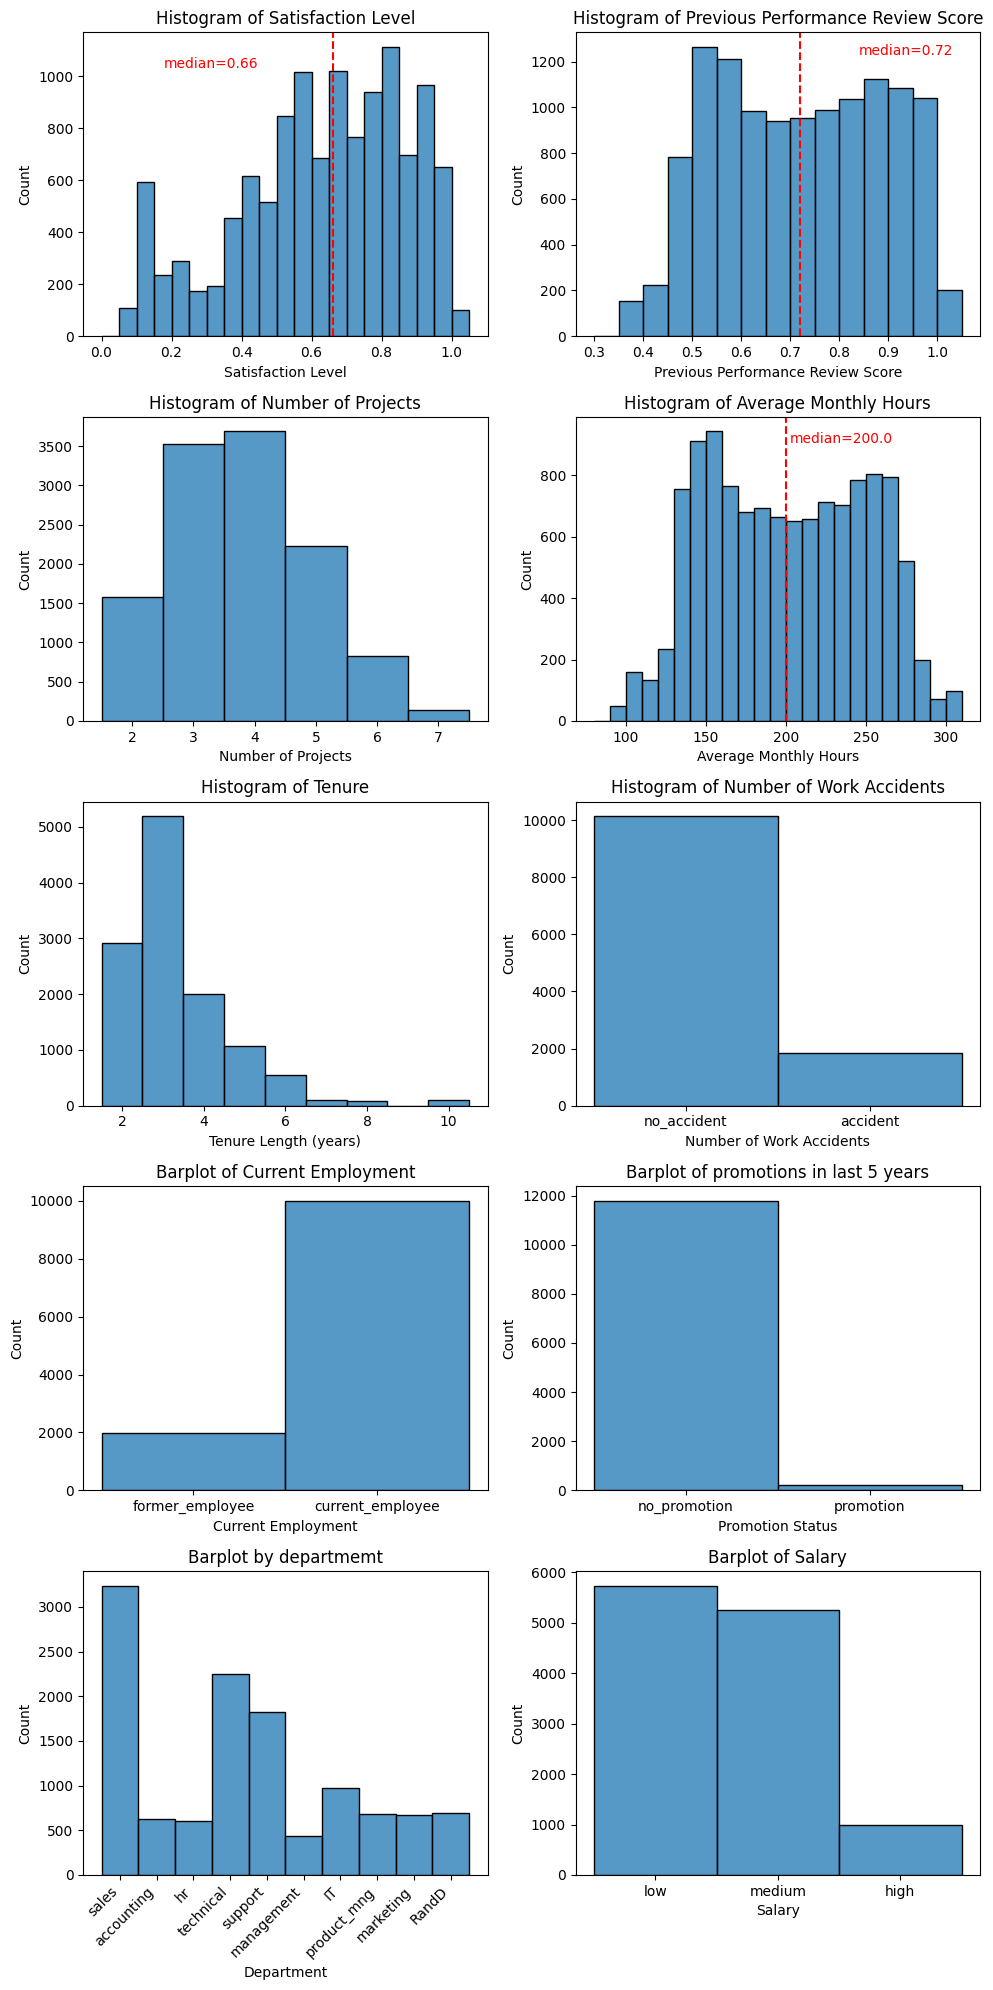

In [16]:
# Create a subplot
fig, ax = plt.subplots(5,2,figsize = (10,20))


# Create a histogram or barplot for every variable
sns.histplot(df1['satisfaction_level'],
             bins = np.arange(0,1.1,0.05),
             ax = ax[0][0])
ax[0,0].set_title('Histogram of Satisfaction Level')
ax[0,0].set_xlabel('Satisfaction Level')
median = df1['satisfaction_level'].median()
ax[0,0].axvline(x = median,color = 'red',linestyle = '--')
ax[0,0].text(0.2, 0.92, f'median={median}', color='red',
            ha='left', va='top', transform=ax[0,0].transAxes)

sns.histplot(df1['last_evaluation'],
             ax = ax[0,1], 
             bins = np.arange(0.3,1.1,0.05))
ax[0,1].set_title('Histogram of Previous Performance Review Score')
ax[0,1].set_xlabel('Previous Performance Review Score')
median = df1['last_evaluation'].median()
ax[0,1].axvline(x = median,color = 'red',linestyle = '--')
ax[0,1].text(0.7, 0.96, f'median={median}', color='red',
            ha='left', va='top', transform=ax[0,1].transAxes)

sns.histplot(df1['number_project'],
             ax = ax[1,0],
             binwidth = 0.5,
             discrete = True)
ax[1,0].set_title('Histogram of Number of Projects')
ax[1,0].set_xlabel('Number of Projects')


sns.histplot(df1['average_monthly_hours'],
             ax = ax[1,1],
             bins = range(80,320,10))
ax[1,1].set_title('Histogram of Average Monthly Hours')
ax[1,1].set_xlabel('Average Monthly Hours')
median = df1['average_monthly_hours'].median()
ax[1,1].axvline(x = median,color = 'red',linestyle = '--')
ax[1,1].text(0.53, 0.95, f'median={median}', color='red',
            ha='left', va='top', transform=ax[1,1].transAxes)

sns.histplot(df1['tenure'],
             ax = ax[2,0],
             discrete = True)
ax[2,0].set_title('Histogram of Tenure')
ax[2,0].set_xlabel('Tenure Length (years)')

sns.histplot(df1['work_accident'],
             ax = ax[2,1])
ax[2,1].set_title('Histogram of Number of Work Accidents')
ax[2,1].set_xlabel('Number of Work Accidents')

data = df1['status'].value_counts()
sns.histplot(df1['status'], 
             ax = ax[3,0])
ax[3,0].set_title('Barplot of Current Employment')
ax[3,0].set_xlabel('Current Employment')

sns.histplot(df1['promotion_last_5years'],
             ax = ax[3][1])
ax[3,1].set_title('Barplot of promotions in last 5 years')
ax[3,1].set_xlabel('Promotion Status')

data = df1['department'].value_counts()
sns.histplot(df1['department'], 
             ax = ax[4,0])
ax[4,0].set_title('Barplot by departmemt')
ax[4,0].set_xlabel('Department')
ax[4,0].set_xticklabels(ax[4,0].get_xticklabels(), rotation=45, ha='right')

sns.histplot(df1['salary'],
             ax = ax[4,1])
ax[4,1].set_title('Barplot of Salary')
ax[4,1].set_xlabel('Salary')

plt.tight_layout()
plt.show()

### **Key Observations**
* Median satisfaction of employee was 0.66 The distribution of the satisfaction score appears to be bimodal with centres around 0.1, and 0.7.
* Median average monthly hours was approximately 200 hours. There is a approximately uniform distribution between 140 hours and 270 hours.
* The largest proportion of employees had a tenure 3 years.
* Most employees did not receive a promotion in the last 5 years.
* The employees from sales, technical, and support make up the largest proportion of responders.
* Most of the salaries of individuals were low or medium.

### **Employee retention by department, number of projects, and average monthly hours**
Because senior leadership is particularly interested in whether an employee will leave because of department, number of projects taken, and average monthly hours, we will begin with these variables.

In [17]:
# Calculate the average number of projects and average monthly hours
df1_former_employee = df1[df1['status'] == "former_employee"]
df1_current_employee = df1[df1['status'] == "current_employee"]


average_monthly_hours_former_employee = df1_former_employee['average_monthly_hours'].mean()
average_monthly_hours_current_employee = df1_current_employee['average_monthly_hours'].mean()

average_number_projects_former_employee = df1_former_employee['number_project'].mean()
average_number_projects_current_employee = df1_current_employee['number_project'].mean()

pd.DataFrame({'Status': ['current_employee', 'former_employee'],
             'Average monthly hours': [average_monthly_hours_current_employee,average_monthly_hours_former_employee],
             'Average number of projects': [average_number_projects_current_employee,average_number_projects_former_employee]})



,Status,Average monthly hours,Average number of projects
0,current_employee,198.94270,3.786800
1,former_employee,208.16223,3.883476


### **Observations**
The monthly average hours for current employees is 198 hours, 10 hours less than former employees (208 hours). The average number of projects is approximately the same between the two groups.

To further confirm if there are statistical difference between the groups, a t-test can be used. The null hypothesis (H0) is that there is not statistical difference in the mean hours worked and number of projects between current and former employees. For the statistical analysis, the significance level will be set at p = 0.95.

In [18]:
# Calculate statistics between
results = []
monthly_hours_ttest = scipy.stats.ttest_ind(df1_former_employee['average_monthly_hours'],
                                             df1_current_employee['average_monthly_hours'],
                                              equal_var = False)

results.append({'Variable':'average_monthly_hours',
                'test statistic':monthly_hours_ttest[0],
                'p value': monthly_hours_ttest[1],
                'df': monthly_hours_ttest.df
    
})

monthly_projects_ttest = scipy.stats.ttest_ind(df1_former_employee['number_project'],
                                             df1_current_employee['number_project'],
                                              equal_var = False)

results.append({'Variable':'number_project',
                'test statistic':monthly_projects_ttest[0],
                'p value': monthly_projects_ttest[1],
                'df': monthly_projects_ttest.df
    
})
pd.DataFrame(results)


,Variable,test statistic,p value,df
0,average_monthly_hours,6.368797,2.267947e-10,2448.175778
1,number_project,2.307798,2.110164e-02,2226.529153


### **Observations**
Because p < 0.05 in both cases, we ***reject*** the null hypothesis. These statistical analysis suggests that there is a statistical difference in the mean monthly hours and number of projects between these current and former employees..

We will now visualise the distribution of average monthly hours and number of projects between these two groups. We will also visualise the proportion of retained employees by department - as requested by our stakeholders.

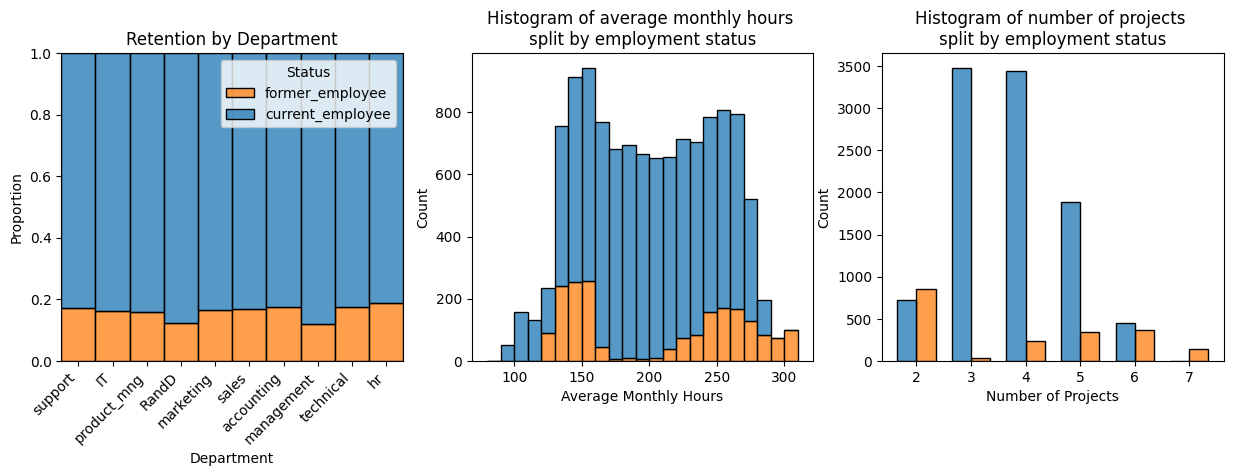

In [19]:
#Sort values to get appropriate colour scheme
df1 = df1.sort_values(['status'], ascending = True)

# Create a subplot
fig, ax = plt.subplots(1,3,figsize = (15,4))
sns.histplot(data = df1,
             x = 'department',
             multiple = 'fill',
             hue = 'status',
             ax = ax[0])

# Recreate histogram for department, number of projects, and average monthly hours, splitting by employment status
ax[0].set_xlabel('Department')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 45, ha = 'right')
ax[0].set_ylabel('Proportion')
ax[0].set_title('Retention by Department')
ax[0].legend(title = 'Status',labels = ['former_employee','current_employee'])

sns.histplot(data = df1, x = 'average_monthly_hours',
             hue = 'status',
             bins = range(80,320,10),
             ax = ax[1],
             multiple = 'stack',
             legend = False)

ax[1].set_xlabel('Average Monthly Hours')
ax[1].set_title('Histogram of average monthly hours \nsplit by employment status')

sns.histplot(data = df1,
             x = 'number_project',
             multiple = 'dodge',
             hue = 'status',
             binwidth = 0.5,
             discrete = True,
             shrink = 0.7,
             ax = ax[2],
             legend = False)

ax[2].set_xlabel('Number of Projects')
ax[2].set_title('Histogram of number of projects \nsplit by employment status')

plt.show()


### **Observations**
* The proportion of ex-employees is approximately equal amongst the different departments. This observation suggests that the department is not an important driver for employee churn
* As demonstrated by our statistical test, there is indeed a difference in distribution of monthly average hours worked between current and former employees. There is increased employee churn when average monthly hour exceeds 200 hours. This is equivalent to working > 9 hours/day, based on a 22 day working month. Interestingly, there is also an increased number of employee churn for those working approximately 150 hours per month, forming an overall bimodal distribution. 
* Similarly, we observe a different distribution in number of projects between current and former employees. Employees who contributed to a larger number of projects experienced greater employee churn. Interestingly, there is still a high number of employee churn when working on 2 projects.

### **Summary**
The increased employee churn for a high average monthly hours and number of projects appears consistent with increased burnout and fast turn-around with projects. This can be further analysed by looking at the satistfaction levels of these employees.

For employees that appear to leave despite a low number of projects or average monthly hours may have additional motivating factors that contribute to their resignation. This might include salary, satisfaction level, performance, or work accidents. The effects of these variables will need to be explored further.

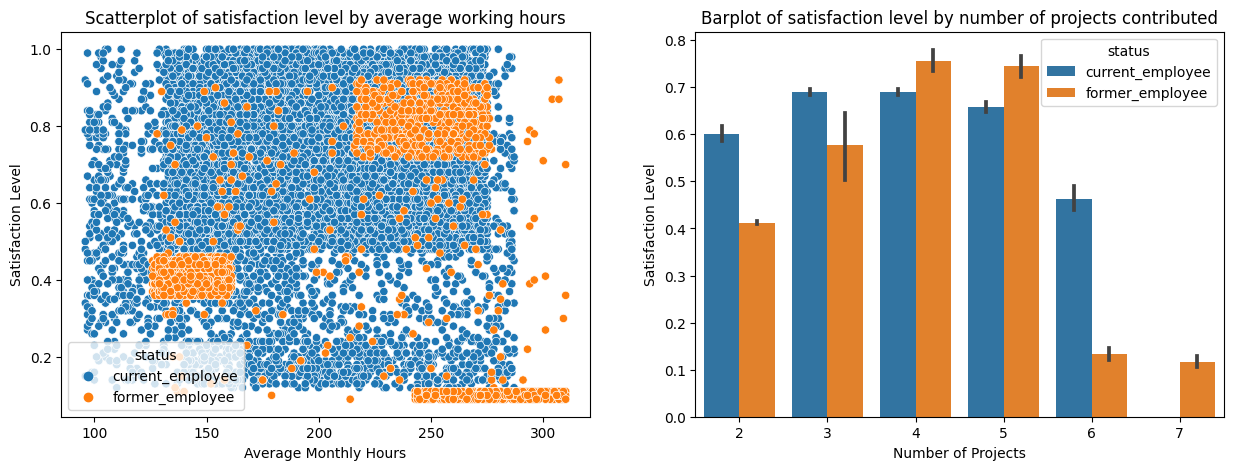

In [20]:
# Create a scatter plot of satisfaction 
fig, ax = plt.subplots(1,2,figsize = (15,5))
sns.scatterplot(data = df1,
                x = 'average_monthly_hours',
                y = 'satisfaction_level',
                hue = 'status',
                ax = ax[0])
ax[0].set_title('Scatterplot of satisfaction level by average working hours')
ax[0].set_xlabel('Average Monthly Hours')
ax[0].set_ylabel('Satisfaction Level')

# Barplot of satisfaction vs projects
sns.barplot(data = df1,
            x = 'number_project', 
            y = 'satisfaction_level',
            hue = 'status', 
            estimator = 'mean')

ax[1].set_title('Barplot of satisfaction level by number of projects contributed')
ax[1].set_xlabel('Number of Projects')
ax[1].set_ylabel('Satisfaction Level')

plt.show()

### **Observations**
* There are three distinct groups of people when observing the satisfaction level of current and former employees based on average monthly working hours. One group works around ~ 150 hours with a satisfaction level ~ 0.4, on group working ~250 hours with a satisfaction ~ 0.8, and on group working 250+ hours with a satisfaction ~ 0.1. Further investigation is need to distinguish why these distinct groups form. Curent employees have a fairly uniform distribution of satisfaction level per average monthly hours with a majority of these individuals working between 130 - 270 hours and having a satisfaction level >0.5.
*  The average satisfaction level of current employees is fairly uniform between 2-6 projects. For former employees, there appears to be increasing satisfaction when taking 4 or 5 projects (~0.75). However their average satisfiaction dramatically drops when taking 6 or 7 projects. Further analysis is need to explain why these individuals might be dissatisfied.

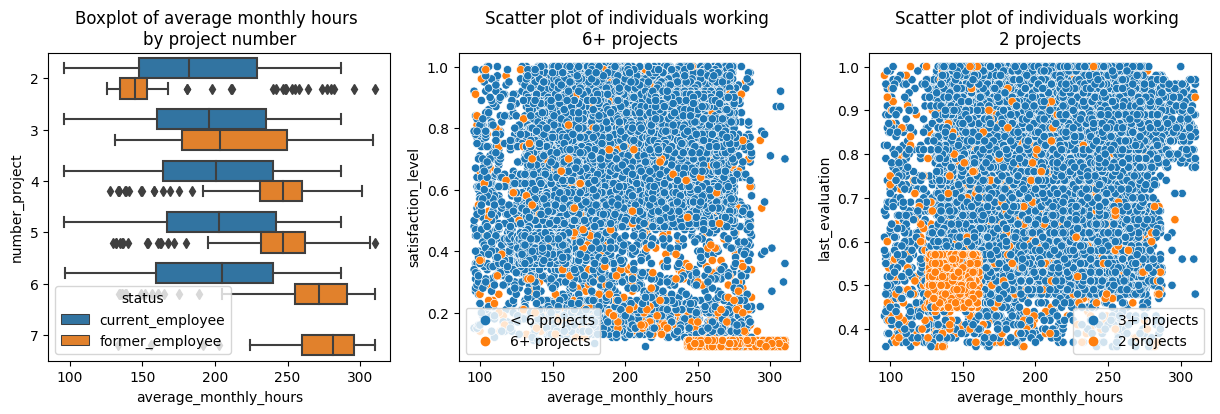

In [21]:
df1['average_hours_per_project'] = df1['average_monthly_hours'] / df1['number_project']

fig,ax = plt.subplots(1,3,figsize = (15,4))
sns.boxplot(data = df1,
            x = 'average_monthly_hours',
            y = 'number_project',
            hue = 'status',
            orient = 'h',
           ax = ax[0])
ax[0].set_title('Boxplot of average monthly hours \nby project number')

df1['more_than_6projects'] = np.where(df1['number_project']>=6,'6+ projects','< 6 projects')
sns.scatterplot(data = df1,
                x = 'average_monthly_hours',
                y = 'satisfaction_level',
                hue = 'more_than_6projects',
                ax = ax[1])
ax[1].legend(title = None)
ax[1].set_title('Scatter plot of individuals working \n6+ projects')

df1['less_than_2projects'] = np.where(df1['number_project']<=2,'2 projects','3+ projects')

sns.scatterplot(data = df1,
                x = 'average_monthly_hours',
                y = 'last_evaluation',
                hue = 'less_than_2projects',
               ax = ax[2])
ax[2].legend(title = None)
ax[2].set_title('Scatter plot of individuals working \n2 projects')
plt.show()

### **Observation**
* All employees who work 7 projects left the company. They also worked the highest average monthly hours. Employees were also more likely to leave if they worked 6 projects and a higher number of average monthly hours. These same individuals also had the lowest satisfaction scores. It is likely that these individuals are leaving due to poor work conditions.
* Conversely, employees who contributed to only 2 projects, worked low monthly hours, with poor performance were also likely to leave. These might represent individuals who left due to underperformance.


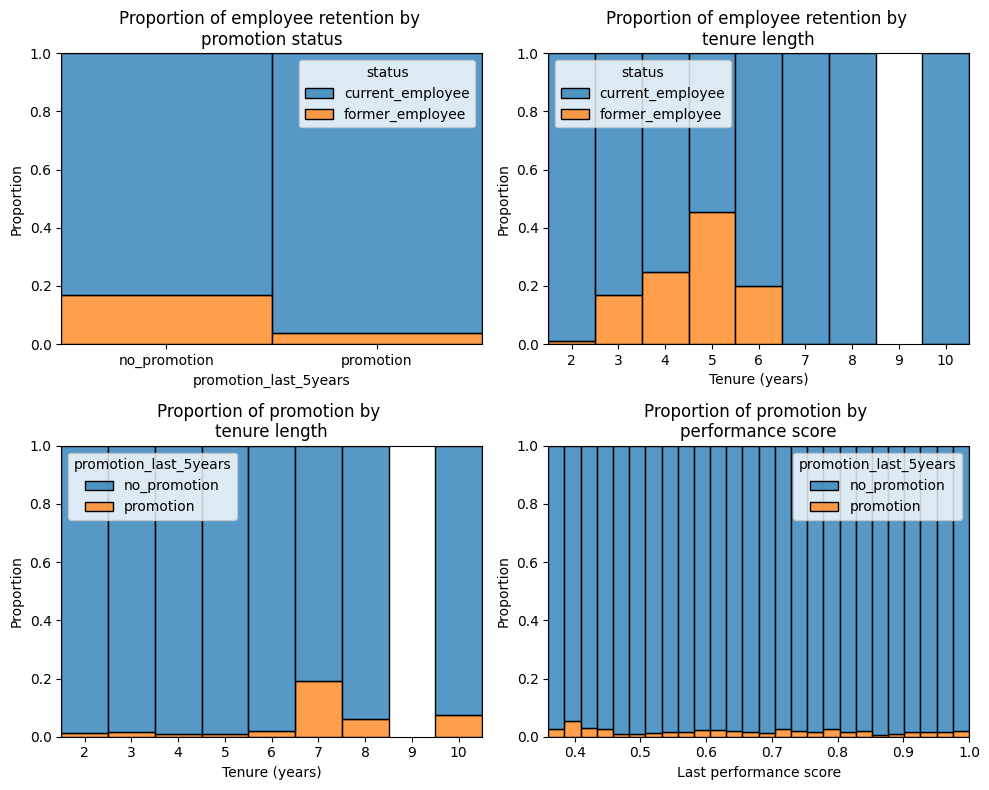

In [22]:
fig,ax = plt.subplots(2,2,figsize = (10,8))

sns.histplot(data = df1,
            x = 'promotion_last_5years',
            hue = 'status',
            multiple = 'fill',
            ax = ax[0,0])
ax[0,0].set_title('Proportion of employee retention by \npromotion status')
ax[0,0].set_ylabel('Proportion')

sns.histplot(data = df1,
             x = 'tenure',
             hue = 'status',
             multiple = 'fill',
             discrete = True,
             ax = ax[0,1])
ax[0,1].set_title('Proportion of employee retention by \ntenure length')
ax[0,1].set_ylabel('Proportion')
ax[0,1].set_xlabel('Tenure (years)')
             

sns.histplot(hue = 'promotion_last_5years',
             data = df1, x = 'tenure', 
             multiple = 'fill',
             discrete = True,
             ax = ax[1,0])
ax[1,0].set_title('Proportion of promotion by \ntenure length')
ax[1,0].set_ylabel('Proportion')
ax[1,0].set_xlabel('Tenure (years)')

sns.histplot(data = df1, 
             x = 'last_evaluation',
             hue = 'promotion_last_5years',
             multiple = 'fill')
ax[1,1].set_title('Proportion of promotion by \nperformance score')
ax[1,1].set_ylabel('Proportion')
ax[1,1].set_xlabel('Last performance score')

plt.tight_layout()
plt.show()

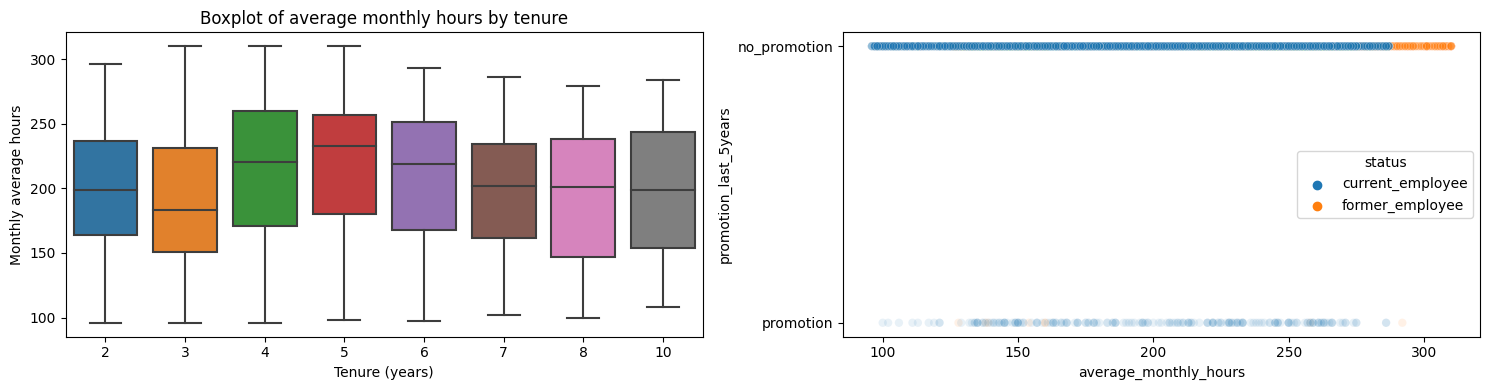

In [23]:
fig,ax = plt.subplots(1,2,figsize = (15,4))
sns.boxplot(data = df1, 
            x = 'tenure',
            y = 'average_monthly_hours',
            ax = ax[0])
ax[0].set_title('Boxplot of average monthly hours by tenure')
ax[0].set_xlabel('Tenure (years)')
ax[0].set_ylabel('Monthly average hours')

df1 = df1.sort_values('status',ascending = False)
sns.scatterplot(data = df1,
                x = 'average_monthly_hours',
                y = 'promotion_last_5years',
                hue = 'status',
                alpha = 0.1,
                hue_order = ['current_employee','former_employee'],
                ax = ax[1])

plt.tight_layout()
plt.show()


In [24]:
df1['status'].value_counts()

status
current_employee    10000
former_employee      1991
Name: count, dtype: int64

### **Observations**
* Those who were promoted were less likely to leave the company than those who did not get promoted.
* Individuals who had a tenure of 3-6 years were more likely to leave the company. These tend to be individuals who worked higher hours.
* Individuals who had worked 7+ years were more likely to get promoted.
* The promotion of an individual did not seem to correlate with performance.

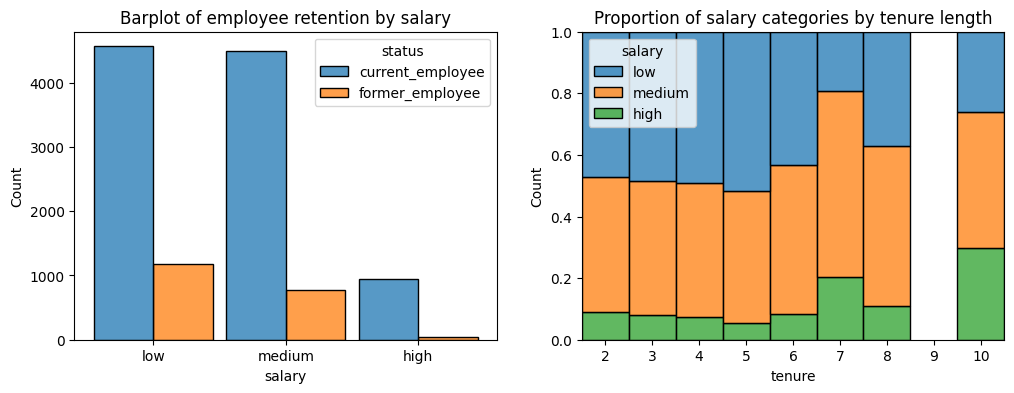

In [25]:
df1 = df1.sort_values('status',ascending = True)
fig,ax = plt.subplots(1,2,figsize = (12,4))
sns.histplot(data = df1,
            x = 'salary',
            hue = 'status',
            multiple = 'dodge',
            shrink = 0.9,
            ax = ax[0])
ax[0].set_title('Barplot of employee retention by salary')


sns.histplot(data = df1,
             x = 'tenure',
             hue = 'salary',
             multiple = 'fill',
             discrete = True)
ax[1].set_title('Proportion of salary categories by tenure length')
plt.show()

### **Observations**
* Those with high salaries were unlikely to leave the company comapred with those on low or medium salaries.
* The proportion of low, medium or high salaries is approximately equal between all tenure years and thus salaries is unlikely the reason for larger employee churn between 3-6 years tenure.

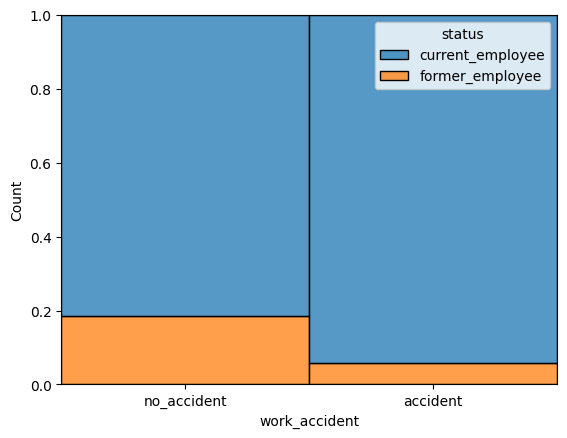

In [26]:
sns.histplot(data = df1,
            x = 'work_accident',
            hue = 'status',
            multiple = 'fill')
plt.show()

### **Observations**
* Having an accident at work did not correlate with employee leaving the company.

## **3.1 Key Summary**
* Employer churn did not seem to be correlated with the department.
* Individuals who worked longer hours (250+) and more projects (6+) were more likely to leave the company.
* Individuals with lower monthly average hours (\~150 hours), contributing to 2 projects, and low evaluation scores (\~0.5) were likely underperforming staff and were let go.
* Employees who received a promotion were less likely to leave. However, promotions appeared to be given based on tenure length rather than performance.
* Employees with a tenure length between 3-6 years were most likely to leave. On average, these individuals worked more hours.
* Individuals with a high salary were more likely to stay than those with low or medium salaries. The salaries, however, did not correlate with tenure length.

# 4. **Construct**
The aim of the project is to produce a model which can predict employee resignation. Because the outcome is a binary classification, linear regression models are not suitable to answer such questions. Logistic regression would provide a clear and quantifiable link between the variables and the outcomes. However, because of the potential interaction between variables, the resulting solution can become complex. Instead, tree-based ensemble learning such as using Random Forest Classifier or XGBoost could be more useful. Although they are more of a "black-box" solutions than logistic regression models, they can more effectively capture interactions between parameters. Here we will be comparing both ensemble-based methods with a validation set before concluding its performance with a final test set. All available parameters will be used in the training.

In [27]:
# Check for class imbalance
df0['status'].value_counts(normalize = True)*100

status
0    83.39588
1    16.60412
Name: proportion, dtype: float64

There is a class imbalancec between the number of current and former employees in the dataset. However, because the positive class (*i.e.,* former_employee) is more than 10% of the dataset, it is unnecessary to perform any upsampling. However, it would be important to equally split the positive class between the training, validation, and test sets.

In [28]:
# One hot encode all categorical data
df0_OHE = pd.get_dummies(df0)
df0_OHE.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,status,promotion_last_5years,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0.11,0.88,7,272,4,0,1,0,False,False,...,False,False,False,False,True,False,False,False,False,True
3,0.72,0.87,5,223,5,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False
4,0.37,0.52,2,159,3,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False


In [29]:
# Find the x and y variables
x = df0_OHE.copy().drop(['status'], axis = 1)
y = df0_OHE['status'].copy()

# Split the dataset 60/20/20. Stratify the results to ensure proper class balance in the split.
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.2,
                                                    stratify = y, 
                                                    random_state = 42)

x_tr, x_val, y_tr, y_val = train_test_split(x_train,
                                            y_train,
                                            test_size = 0.25,
                                            stratify = y_train,
                                            random_state = 42)


To optimize the model, we will use GridSearch (with cross-validation) to find the optimal parameters. In this scenario:
* A false positive (FP) represents an individual who did not leave the company but was identified as leaving the company.
* A false negative represents and individual who did leave the company but was identified as **NOT** leaving the company.

Because our aim is to determine employee churn, it is an imperative to ensure that all employees that did leave the company is detected (*i.e.,* reducing FN). On the other hand, there is limited downside in incorrectly identifying an individual who will not leave as leaving. Therefore, **recall** will be used to evaluate the effectiveness of the model.

In [30]:
# Instantiate the model and calculate metrics based on validation set
rf = RandomForestClassifier(random_state = 42)
rf.fit(x_tr,y_tr)
y_pred_rf = rf.predict(x_val)

# Helper function to calculate accuracy, precision, f1, and recall
def get_scores(model_name, y_pred, y_val):
    accuracy = accuracy_score(y_val,y_pred)
    precision = precision_score(y_val,y_pred)
    f1 = f1_score(y_val,y_pred)
    recall = recall_score(y_val,y_pred)
    table = pd.DataFrame([{'Model': model_name,
                             'Accuracy': accuracy,
                             'Precision':precision,
                             'Recall':recall,
                             'f1':f1}])
    return table

# Create a new dataframe summarising the model metrics
rf_model_results = get_scores('Random Forest',y_pred_rf,y_val)
model_summary = rf_model_results.copy()
model_summary


,Model,Accuracy,Precision,Recall,f1
0,Random Forest,0.982902,0.978552,0.917085,0.946822


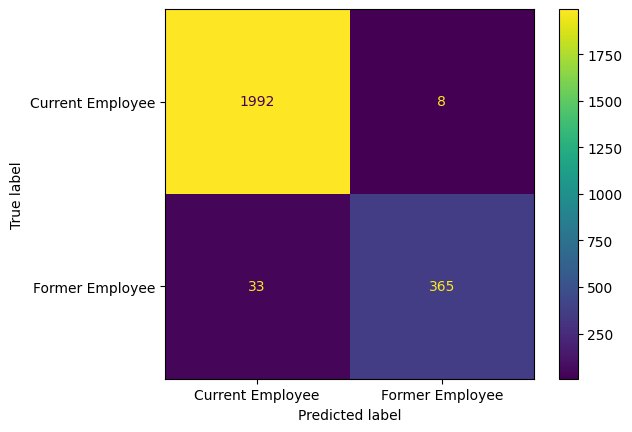

In [31]:
# Create a confusion matrix to display the classification
cm_rf = confusion_matrix(y_val,y_pred_rf,labels = rf.classes_)
display_labels = ['Current Employee', 'Former Employee']
ConfusionMatrixDisplay(confusion_matrix = cm_rf, display_labels = display_labels).plot()
plt.show()

Based on the confusion matrix, the model has relatively high accuracy, precision, and recall. There are relatively few false positives and false negatives. However, the model is more likely to predict a false negative (*i.e.,* individual who leaves the company but is not predicted to do so) than a false positive. Hyperparameter tuning could improve the model.

In [32]:
# Perform a gridsearch of the parameters to optimize the random forest classifier
rf = RandomForestClassifier(random_state = 42)
cv_params = {'max_depth': [10,15,20],
            'n_estimators':[200,400],
            'max_features': [6,9,12]}

# A different way to set scoring array to prevent precision warning ouput
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, zero_division=0),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}


rf_cv = GridSearchCV(rf,cv_params,scoring = scoring,refit = 'recall',cv = 5,n_jobs = -1)


In [33]:
%%time
rf_cv.fit(x_tr,y_tr)

CPU times: user 4.36 s, sys: 120 ms, total: 4.48 s
Wall time: 1min 20s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20], 'max_features': [6, 9, 12],
                         'n_estimators': [200, 400]},
             refit='recall',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1': make_scorer(f1_score),
                      'precision': make_scorer(precision_score, zero_division=0),
                      'recall': make_scorer(recall_score)})

In [34]:
# Get performance based on validation set
y_pred_rf_cv = rf_cv.best_estimator_.predict(x_val)
rf_cv_model_results = get_scores('Random Forest Tuned',y_pred_rf_cv,y_val)
model_summary = pd.concat([model_summary,rf_cv_model_results],ignore_index = True)
model_summary

,Model,Accuracy,Precision,Recall,f1
0,Random Forest,0.982902,0.978552,0.917085,0.946822
1,Random Forest Tuned,0.985822,0.981481,0.932161,0.956186


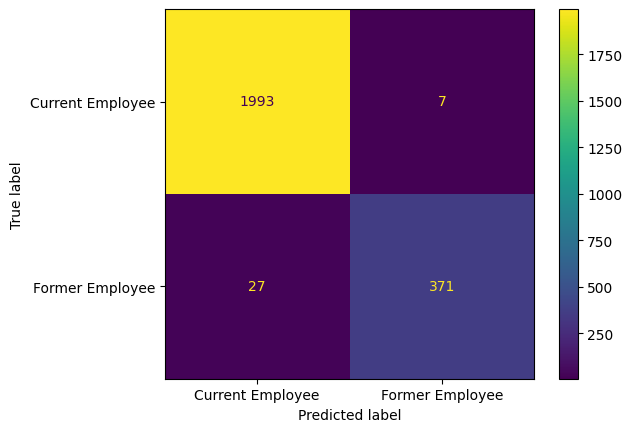

In [35]:
#Create a confusion matrix to summarise classification
cm_rf_cv = confusion_matrix(y_val,y_pred_rf_cv,labels = rf_cv.classes_)
ConfusionMatrixDisplay(confusion_matrix = cm_rf_cv, display_labels = display_labels).plot()
plt.show()

In [36]:
rf_cv.best_params_

{'max_depth': 10, 'max_features': 12, 'n_estimators': 400}

There are slight improvements to all metrics with the tuned random forest classifier. Further tuning is likely possible, however the performance of this tuned model should be sufficient as a comparator. The optimal properties of the tune model include a max_depth = 10, max_features = 12, and n_estimator = 200.

Next we examine the use of a boosting model (*i.e.,* XGBoost) as a comparison.

In [37]:
# Instantiate XGBoost model
xgb = XGBClassifier(random_state = 42)
xgb.fit(x_tr,y_tr)
y_pred_xgb = xgb.predict(x_val)
xgb_model_results = get_scores('XGBoost',y_pred_xgb,y_val)
model_summary = pd.concat([model_summary,xgb_model_results],ignore_index = True)
model_summary

,Model,Accuracy,Precision,Recall,f1
0,Random Forest,0.982902,0.978552,0.917085,0.946822
1,Random Forest Tuned,0.985822,0.981481,0.932161,0.956186
2,XGBoost,0.981651,0.968254,0.919598,0.943299


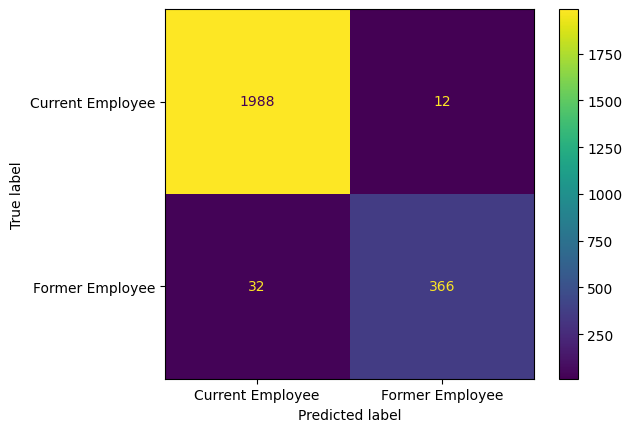

In [38]:
# Producing a confusion matrix to summarise classification
cm_xgb = confusion_matrix(y_val,y_pred_xgb,labels = rf_cv.classes_)
ConfusionMatrixDisplay(confusion_matrix = cm_xgb, display_labels = display_labels).plot()
plt.show()

Again, the XGBoost model can be optimised through hyperparameter tuning.

In [39]:
# Set up parameters for GridSearch
xgb_cv = XGBClassifier(random_state = 42)
cv_params = {'max_depth': [2,4,6],
            'n_estimators':[200,300,400],
            'learning_rate':[0.1,0.2,0.3],
            'min_child_weight':[0.5,0.75,1]}

xgb_cv = GridSearchCV(xgb_cv,cv_params,scoring = scoring,refit = 'recall',cv = 5,n_jobs = -1)

In [40]:
%%time
xgb_cv.fit(x_tr,y_tr)

CPU times: user 1.94 s, sys: 199 ms, total: 2.14 s
Wall time: 42.8 s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [2, 4, 6],
                         'min_child_weight': [0.5, 0.75, 1],
                         'n_estimators': [200, 300, 400]},
             refit='recall',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1': make_scorer(f1_score),
                      'precision': make_scorer(precision_score, zero_division=0),
                      'recall': make_scorer(recall_score)})

In [41]:
# Summarising the performance metric of the tuned XGBoost model using validation set
y_pred_xgb_cv = xgb_cv.best_estimator_.predict(x_val)
xgb_cv_model_results = get_scores('XGBoost Tuned',y_pred_xgb_cv,y_val)
model_summary = pd.concat([model_summary,xgb_cv_model_results],ignore_index = True)
model_summary


,Model,Accuracy,Precision,Recall,f1
0,Random Forest,0.982902,0.978552,0.917085,0.946822
1,Random Forest Tuned,0.985822,0.981481,0.932161,0.956186
2,XGBoost,0.981651,0.968254,0.919598,0.943299
3,XGBoost Tuned,0.984987,0.976316,0.932161,0.953728


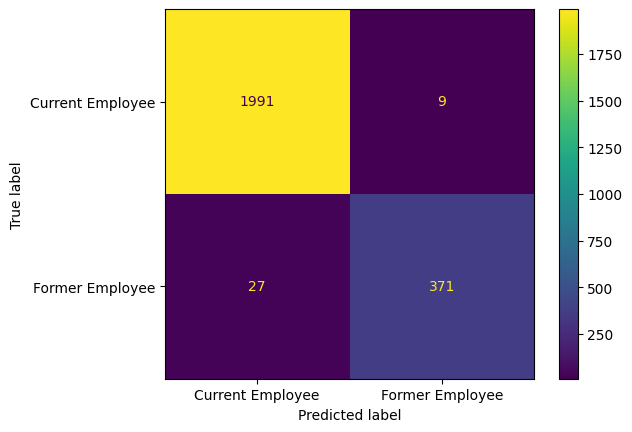

In [42]:
# Producing a confusion matrix to summarise classification
cm_xgb_cv = confusion_matrix(y_val,y_pred_xgb_cv,labels = rf_cv.classes_)
ConfusionMatrixDisplay(confusion_matrix = cm_xgb_cv, display_labels = display_labels).plot()
plt.show()

In [43]:
#Finding best parameters for XGBoost model
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 0.5,
 'n_estimators': 200}

We see improvements across all metrics compared to the untuned XGBoost model. The optimal parameters found were when the learning_rate = 0.1, max_depth = 0.4, min_child_weight of 0.5, and n_estimators = 200.

## **4.2 Key Summary**
Both hyperparameter tuning of the Random Forest Classifier and XGBoost models led to increased performance across all metrics. Having the highest recall and f1 score, the **XGBoost Tuned** model will be used for the final test. We do notice lower precision compared to the random forest classifier. However, as mentioned previously, it is more important to reduce the number of false negatives (*i.e.,* those labelled not leaving but left) compared to false positives. (*i.e.,* those who are labelled to leave and did not).


# **5. Evaluation**

## **5.1 Model metrics**

In [44]:
y_pred_xgb_cv_test= xgb_cv.predict(x_test)

xgb_cv_model_results.iloc[0,0] = 'XGBoost Tuned Validation'
pd.concat([xgb_cv_model_results,get_scores('XGBoost Tuned Test',y_pred_xgb_cv_test, y_test)])


,Model,Accuracy,Precision,Recall,f1
0,XGBoost Tuned Validation,0.984987,0.976316,0.932161,0.953728
0,XGBoost Tuned Test,0.982910,0.963636,0.932161,0.947637


As observed from the test metrics, the model performed almost identically in our test dataset and validation dataset. This indicates that the model is well-fitted and appropriate understands the relationship between the different variables. Although the accuracy, precision, and f1 score are slightly lower than our validation tests, importantly, the recall score has been maintained as desired. 

The model achieved:
* Accuracy: 98.3%
* Precision: 96.4%
* Recall: 93.2%
* F1: 94.7%

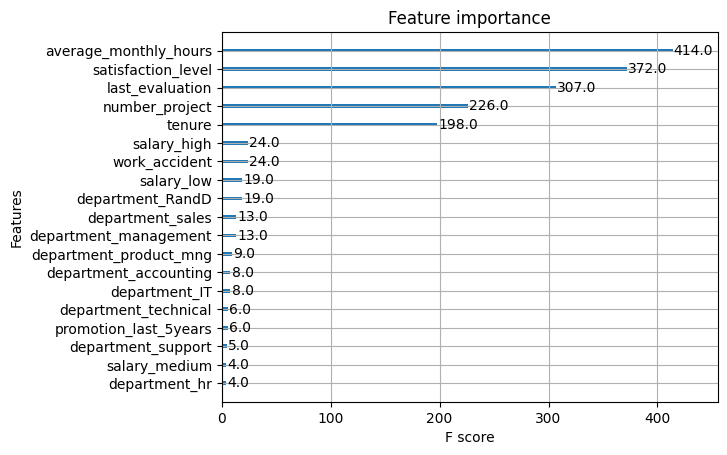

In [45]:
plot_importance(xgb_cv.best_estimator_)
plt.show()

Plotting the importance of the different variables to the classifier, we can observe that the 5 highest features that contribute to an employee leaving include `average_monthly_hours`, `satisfaction_level`, `last_evaluation`, `number_project`, `tenure`. Variables that were no predictive include `salary`, `department`, and `work_accident`. These observations are consistent with our previous visualisations and data analysis.

## 5.2 Recommendations
* **Limit the number of work hours/projects**. The average monthly hours and number of projects taken are one of the highest contributors to employee churn. This likely indicates that these workers are burnt-out by the environment. A limit in the number of hours woked, projects taken, or change in company culture is required to address this issue.

* **Improve employee satisfaction**. Different strategies to improve employee satisfaction might include allowing individuals to pick projects of interest, working from home arrangements, growth/career opportunities. It is important to survey what is causing employee dissatisfaction and continued employee surveillance will be beneficial in understanding changes in attitudes with implemented strategies.

* **Recognise employee performance**. Currently, promotions appear to be given according to tenure length rather than employee performance. Bias or favouritism in the promotion process can undermine confidence and bring low morale. It is recommended the promotion process be reviewed an assessed by an independent panel.

* **Improve worker performance**. It is evident that some employees are falling behind their peers, leading to poor performance evaluation. Although the exact reason for their low performance is unknown, improved mentoring and implementing career/growth plans could be beneficial in improving their work performance.

## 